<a href="https://colab.research.google.com/github/suminkim1021/wiset/blob/main/sumin__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  google drive 연결

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


# 데이터 정리

In [ ]:
#원본 이미지 넘버링하기
import os
import glob

path = "/content/drive/MyDrive/CT/original"
CT_COVID = glob.glob(path+"/CT_COVID" + '/*')
CT_NonCOVID = glob.glob(path+"/CT_NonCOVID"+'/*')



def rename(files):

  if 'CT_COVID' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/CT_COVID", 'CT_COVID_' + '{0:03d}.png'.format(i)))
     dolphin = glob.glob(path+"/CT_COVID" + '/*')    
     print("CT_COVID {}번째 이미지까지 성공".format(i+1))

  elif 'CT_NonCOVID' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/CT_NonCOVID", 'CT_NonCOVID_' + '{0:03d}.jpg'.format(i)))
     shark = glob.glob(path+"/CT_NonCOVID"+'/*')
     print("CT_NonCOVID {}번째 이미지까지 성공".format(i+1))


In [ ]:
rename(CT_COVID)
rename(CT_NonCOVID)

CT_COVID 350번째 이미지까지 성공
CT_NonCOVID 397번째 이미지까지 성공


In [ ]:
CT_COVID= sorted(glob.glob(path+"/CT_COVID" + '/*'))
CT_NonCOVID = sorted(glob.glob(path+"/CT_NonCOVID"+'/*'))

print('CT_COVID 이미지 개수: {}\nCT_NonCOVID 이미지 개수: {}\n'.format(len(CT_COVID), len(CT_NonCOVID)))

CT_COVID 이미지 개수: 349
CT_NonCOVID 이미지 개수: 397



In [ ]:
whole_sum = len(CT_COVID)+len(CT_NonCOVID)

print('전체 이미지 개수 : {}\n\nCT_COVID 이미지 비율 : {:.2f}%\nCT_NonCOVID 이미지 비율 : {:.2f}%\n'.format( whole_sum, 100*len(CT_COVID)/whole_sum, 100*len(CT_NonCOVID)/whole_sum ))

전체 이미지 개수 : 747

CT_COVID 이미지 비율 : 46.85%
CT_NonCOVID 이미지 비율 : 53.15%



# 이미지 시각화하기

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [ ]:
# cv2를 이용해 이미지를 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # cvtColor로 BGR을 RGB로 바꿔줌

In [ ]:
# 각 이미지 폴더에서 3개씩 랜덤으로 이미지 시각화 하기

# 이미지 array 준비
import random
img_arrs = []
img_num = range(0,300)

for i in random.sample(img_num,3):
    
    img_arrs.append(read_img(CT_COVID[i]))
    img_arrs.append(read_img(CT_NonCOVID[i]))

In [ ]:
print("총 {}개의 이미지 ".format(len(img_arrs)))

총 6개의 이미지 


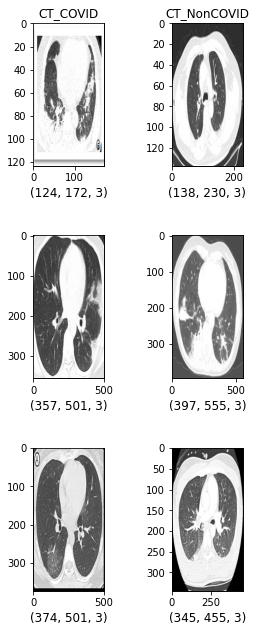

In [ ]:
rows = 3 # 3개씩 샘플링 했으므로
columns = 2

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*2, rows*3))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 15번 까지
    
    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    idx = num - 1 # 인덱스
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정



# 제목 설정
cols = ['CT_COVID', 'CT_NonCOVID']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

# 이미지 랜덤으로 추출하여 train/test split 하기
> 약 train:test 비율을 8:2 로 지정함

In [ ]:
path = "/content/drive/MyDrive/CT/original"
CT_COVID = sorted(glob.glob(path+"/CT_COVID" + '/*'))
CT_NonCOVID = sorted(glob.glob(path+"/CT_NonCOVID"+'/*'))

print('CT_COVID 이미지 개수: {}\nCT_NonCOVID 이미지 개수: {}\n'.format(len(CT_COVID), len(CT_NonCOVID)))

CT_COVID 이미지 개수: 349
CT_NonCOVID 이미지 개수: 397



In [ ]:
# 비율이 작은 test로 빠르게 split

import math

CT_COVID_test_count = round(len(CT_COVID)*0.2)
CT_NonCOVID_test_count = round(len(CT_NonCOVID)*0.2)


print('CT_COVID test파일에 들어갈 이미지 개수 : {}/{}'.format(CT_COVID_test_count,len(CT_COVID)))
print('CT_NonCOVID test파일에 들어갈 이미지 개수 : {}/{}'.format(CT_NonCOVID_test_count,len(CT_NonCOVID)))


CT_COVID test파일에 들어갈 이미지 개수 : 70/349
CT_NonCOVID test파일에 들어갈 이미지 개수 : 79/397


In [ ]:
import shutil
def split( img_list, test_count, train_path, test_path):
  
  test_files=[]
  for i in random.sample( img_list, test_count ):
    test_files.append(i)

  # 차집합으로 train/test 리스트 생성하기
  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
# CT_COVID 파일
CT_COVID_train_path='/content/drive/MyDrive/CT/train/CT_COVID'
CT_COVID_test_path='/content/drive/MyDrive/CT/test/CT_COVID'

CT_NonCOVID_train_path='/content/drive/MyDrive/CT/train/CT_NonCOVID'
CT_NonCOVID_test_path='/content/drive/MyDrive/CT/test/CT_NonCOVID'


split(CT_COVID, CT_COVID_test_count, CT_COVID_train_path, CT_COVID_test_path)
split(CT_NonCOVID, CT_NonCOVID_test_count, CT_NonCOVID_train_path, CT_NonCOVID_test_path)


train 폴더 이미지 개수 : 280
test 폴더 이미지 개수 : 70
train 폴더 이미지 개수 : 318
test 폴더 이미지 개수 : 79


# train/test로 split한 image들 다시 넘버링하기

In [ ]:
# 원본 이미지 넘버링하기 -> rename 함수를 만들어줬으므로 경로만 바꿔서 재사용

# trainset 넘버링

path = "/content/drive/My Drive/CT/train"
CT_COVID = glob.glob(path+"/CT_COVID" + '/*')
CT_NonCOVID = glob.glob(path+"/CT_NonCOVID"+'/*')


rename(CT_COVID)
rename(CT_NonCOVID)


CT_COVID 280번째 이미지까지 성공
CT_NonCOVID 318번째 이미지까지 성공


In [ ]:
path = "/content/drive/MyDrive/CT/train"
CT_COVID = glob.glob(path+"/CT_COVID" + '/*')
CT_NonCOVID = glob.glob(path+"/CT_NonCOVID"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(CT_COVID)[-1]), os.path.basename(sorted(CT_NonCOVID)[-1]))

각각 마지막 파일 이름 :  CT_COVID_279.png CT_NonCOVID_317.jpg


In [ ]:
#testset numbering


path = "/content/drive/MyDrive/CT/test"
CT_COVID = glob.glob(path+"/CT_COVID" + '/*')
CT_NonCOVID = glob.glob(path+"/CT_NonCOVID"+'/*')


rename(CT_COVID)
rename(CT_NonCOVID)


CT_COVID 70번째 이미지까지 성공
CT_NonCOVID 79번째 이미지까지 성공


In [ ]:
path = "/content/drive/MyDrive/CT/test"
CT_COVID = glob.glob(path+"/CT_COVID" + '/*')
CT_NonCOVID = glob.glob(path+"/CT_NonCOVID"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(CT_COVID)[-1]), os.path.basename(sorted(CT_NonCOVID)[-1]))

각각 마지막 파일 이름 :  CT_COVID_069.png CT_NonCOVID_078.jpg


# **이미지 데이터 전처리**


이미지 resize + 스케일링 + augmentation + data loader로 학습 준비



In [ ]:

import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
train_path = '/content/drive/MyDrive/CT/train'
test_path = '/content/drive/MyDrive/CT/test'

CT_COVID = '/CT_COVID/'
CT_NonCOVID= '/CT_NonCOVID'

In [ ]:
resize_trans= transforms.Compose([
                                  transforms.Resize((128,128)),
                                  transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape # ToTensor를 진행했기 때문에 데이터가 torch(C,H,W) 형태로 바뀜

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[0.2941, 0.2941, 0.3020,  ..., 0.2902, 0.2902, 0.2941],
         [0.2941, 0.2941, 0.2902,  ..., 0.2941, 0.2941, 0.2902],
         [0.2902, 0.3020, 0.2941,  ..., 0.2902, 0.2980, 0.2902],
         ...,
         [0.3333, 0.3412, 0.3373,  ..., 0.3098, 0.3216, 0.3333],
         [0.3608, 0.3294, 0.3216,  ..., 0.3333, 0.3333, 0.3216],
         [0.3176, 0.3216, 0.3490,  ..., 0.3333, 0.3216, 0.3255]],

        [[0.2941, 0.2941, 0.3020,  ..., 0.2902, 0.2902, 0.2941],
         [0.2941, 0.2941, 0.2902,  ..., 0.2941, 0.2941, 0.2902],
         [0.2902, 0.3020, 0.2941,  ..., 0.2902, 0.2980, 0.2902],
         ...,
         [0.3333, 0.3412, 0.3373,  ..., 0.3098, 0.3216, 0.3333],
         [0.3608, 0.3294, 0.3216,  ..., 0.3333, 0.3333, 0.3216],
         [0.3176, 0.3216, 0.3490,  ..., 0.3333, 0.3216, 0.3255]],

        [[0.2941, 0.2941, 0.3020,  ..., 0.2902, 0.2902, 0.2941],
         [0.2941, 0.2941, 0.2902,  ..., 0.2941, 0.2941, 0.2902],
         [0.2902, 0.3020, 0.2941,  ..., 0.2902, 0.2980, 0.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2)) # numpy로 바꾸고, axis = 1,2 mean으로 RGB mean/std 뽑기

array([0.6797306, 0.6797306, 0.6797306], dtype=float32)

In [ ]:
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

In [ ]:
get_mean_std(resize_train)

0.5980107 0.5975491 0.5972799
0.28873992 0.2888619 0.2888411


In [ ]:
get_mean_std(resize_test)

0.60123885 0.6012172 0.6014234
0.2951492 0.29510456 0.29500663


In [ ]:
# normalization 준비

resize_train_mean=[0.5980107, 0.5975491, 0.5972799]
resize_train_std=[0.28873992, 0.2888619, 0.2888411]

resize_test_mean=[0.60123885, 0.6012172, 0.6014234]
resize_test_std=[0.2951492, 0.29510456, 0.29500663]

# transform을 이용해 data augmentation하기

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((128, 128)), # 이미지 resize
    transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
    transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=0)

In [ ]:

dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

torch.Size([1, 3, 124, 124])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

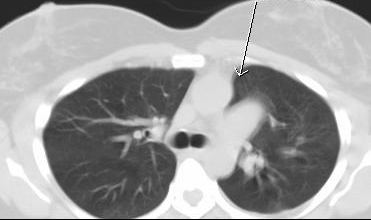

In [ ]:

# 원본 이미지
none_trans[359][0]

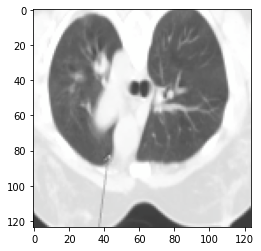

In [ ]:
# augmentation을 적용한 CT 이미지
imshow((trainset[359][0]),resize_train_mean,resize_train_std)

# data pipeline 만들기

In [ ]:
train_path = '/content/drive/MyDrive/CT/train'
test_path = '/content/drive/MyDrive/CT/test'

Dataset_path = '/content/drive/MyDrive/CT'

CT_COVID_dir = '/CT_COVID/'
CT_NonCOVID_dir = '/CT_NonCOVID/'


In [ ]:
from torch.utils.data import Dataset, DataLoader # 데이터 커스터마이징
from PIL import Image # PIL = Python Image Library
import cv2 # albumentation transform을 쓰려면 꼭 이 라이브러리를 이용
import tensorflow as tf

class inhovation_Dataset(Dataset):

  def __init__(self, file_path, mode, transform=None):
    self.all_data = sorted(glob.glob(os.path.join(file_path, mode, '*', '*')))
    self.transform = transform

  def __getitem__(self, index):

    if torch.is_tensor(index):        # 인덱스가 tensor 형태일 수 있으니 리스트 형태로 바꿔준다.
       index = index.tolist()

    data_path = self.all_data[index]
    #img = np.array(Image.open(data_path).convert("RGB")) # albumenatation transform을 쓰려면 cv2 라이브러리로 이미지를 읽어야 함
    image=cv2.imread(data_path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB 변환

    # transform 적용
    if self.transform is not None:    
       augmented = self.transform(image=image)
       image = augmented['image'] 

    # 이미지 이름을 활용해 label 부여
    label=[]                                
    if os.path.basename(data_path).startswith("CT_COVID") == True:
        label = 0
    elif os.path.basename(data_path).startswith("CT_NonCOVID") == True: 
        label = 1
    else :
        label = 2
    return image, label

  def __len__(self):
    length = len(self.all_data)
    return length

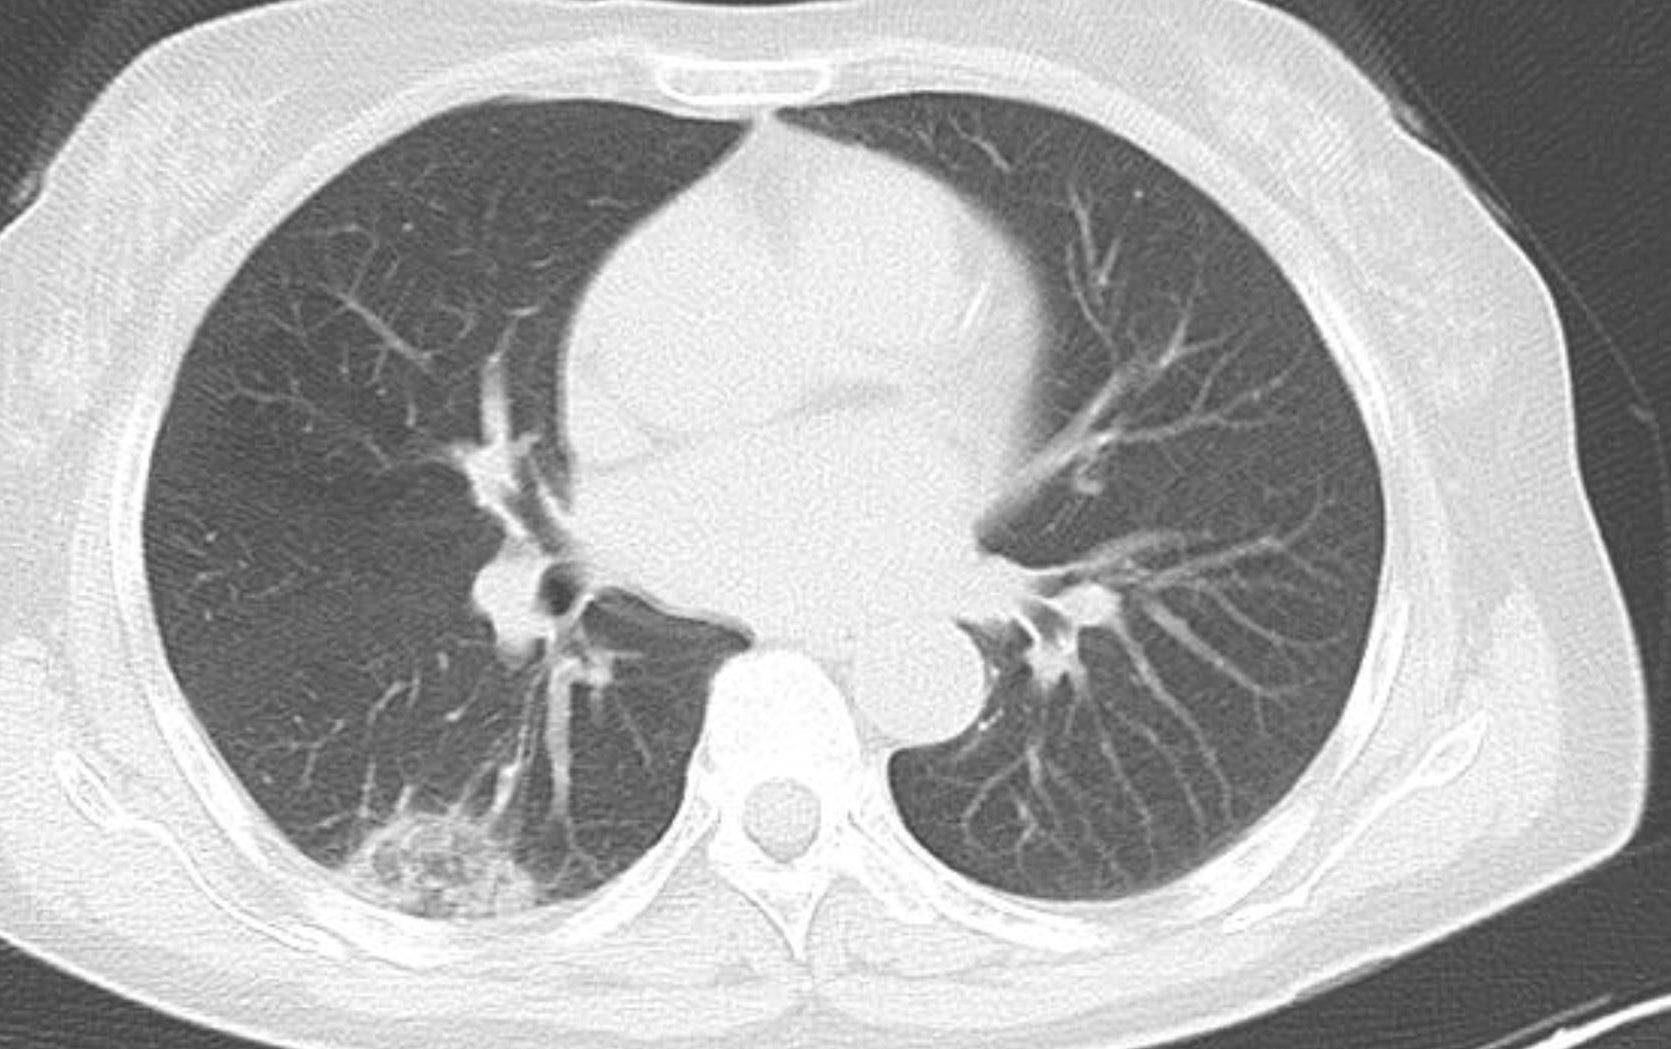

In [ ]:
Image.open(inhovation_Dataset(Dataset_path,'train', transform = None).all_data[0])

# albumentation을 이용해 data augmentation을 적용하기

In [ ]:
import albumentations
import albumentations.pytorch

albumentations_resize = albumentations.Compose([
                                                
    albumentations.Resize(128, 128), 
    albumentations.pytorch.transforms.ToTensor()
    
])

resize_train=inhovation_Dataset(Dataset_path, 'train', transform=albumentations_resize)
resize_test=inhovation_Dataset(Dataset_path, 'test', transform=albumentations_resize)


데이터 클래스를 거쳐 나온 이미지 데이터는 텐서 형태임. 따라서 시각화를 위해 [height, width, channels] 형태로 배열을 다시 바꿔줘야함.

In [ ]:
def tensor_img(img):    
    img = img.permute(1,2,0)
    plt.imshow(img)

In [ ]:

resize_train[488][0].numpy().shape

(3, 128, 128)

In [ ]:
resize_train[488][0].permute(1,2,0).shape

torch.Size([128, 128, 3])

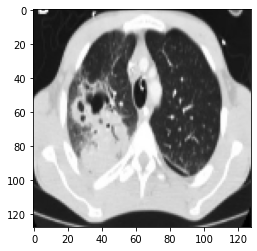

In [ ]:

# 128 x 128 변환 성공
tensor_img(resize_train[488][0])

In [ ]:
import albumentations
import albumentations.pytorch
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더

albumentations_train = albumentations.Compose([
                                                
    albumentations.Resize(128, 128),   
    albumentations.OneOf([
                          albumentations.HorizontalFlip(p=0.8), # p확률로 이미지 좌우 반전
                          albumentations.RandomRotate90(p=0.8), # p확률로 90도 회전
                          albumentations.VerticalFlip(p=0.8) # p확률로 이미지 상하 반전
    ], p=1),

    albumentations.OneOf([
                          albumentations.MotionBlur(p=0.8), # p확률로 이미지를 흐리게(?) 만들어 줌
                          albumentations.OpticalDistortion(p=0.8), # p확률로 이미지 왜곡
                          albumentations.GaussNoise(p=0.8) # 임의의 noise를 삽입          
    ], p=1),
    # albumentations.Normalize(mean = resize_train_mean, std = resize_train_std),
    albumentations.pytorch.ToTensor()
    
])

albumentations_test = albumentations.Compose([
                                                
    albumentations.Resize(128, 128),
    albumentations.pytorch.ToTensor()
    
])


trainset=inhovation_Dataset(Dataset_path, 'train', transform=albumentations_train)
testset=inhovation_Dataset(Dataset_path, 'test', transform=albumentations_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=0)

In [ ]:
trainset[222][0]

tensor([[[0.0784, 0.0667, 0.0706,  ..., 0.1098, 0.0902, 0.0588],
         [0.0980, 0.0824, 0.0706,  ..., 0.0980, 0.0275, 0.1216],
         [0.0902, 0.0431, 0.1176,  ..., 0.0784, 0.0471, 0.0588],
         ...,
         [0.0902, 0.0667, 0.0824,  ..., 0.0784, 0.0824, 0.1647],
         [0.0941, 0.1255, 0.0431,  ..., 0.0667, 0.0824, 0.0824],
         [0.0941, 0.1137, 0.0941,  ..., 0.0549, 0.0863, 0.0824]],

        [[0.0745, 0.0471, 0.0314,  ..., 0.0980, 0.0941, 0.0627],
         [0.1176, 0.0980, 0.1059,  ..., 0.0941, 0.0980, 0.0824],
         [0.0706, 0.0863, 0.0549,  ..., 0.0510, 0.0784, 0.0784],
         ...,
         [0.0902, 0.0745, 0.0941,  ..., 0.1020, 0.0902, 0.0706],
         [0.1098, 0.0706, 0.0706,  ..., 0.0784, 0.0902, 0.0745],
         [0.0745, 0.0588, 0.1098,  ..., 0.0784, 0.1098, 0.0824]],

        [[0.0667, 0.0588, 0.0824,  ..., 0.0510, 0.1137, 0.0745],
         [0.1176, 0.0980, 0.0784,  ..., 0.0980, 0.0980, 0.0902],
         [0.0667, 0.0824, 0.1059,  ..., 0.0863, 0.0824, 0.

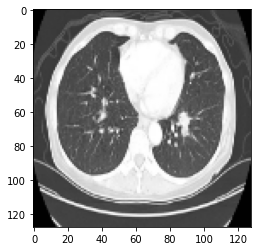

In [ ]:
plt.imshow(resize_train[400][0].permute(1,2,0))

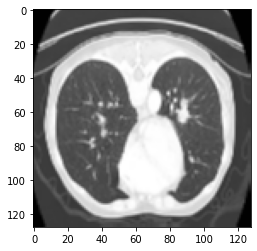

In [ ]:

tensor_img(trainset[400][0])

# 이미지 데이터 파이토치 커스터마이징하기

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=0)

# **Resnet50 기본 틀 만들기**

In [ ]:
# import resnet
import torchvision.models.resnet as resnet
import torch.nn as nn
import torch.optim as optim

# 미리 정의
conv1x1=resnet.conv1x1
Bottleneck = resnet.Bottleneck
BasicBlock= resnet.BasicBlock

In [ ]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=True):
        super(ResNet, self).__init__()
        self.inplanes = 32 # conv1에서 나올 채널의 차원 -> 이미지넷보다 작은 데이터이므로 32로 조정

        # inputs = 3x224x224 -> 3x128x128로 바뀜
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False) # 마찬가지로 전부 사이즈 조정
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 32, layers[0], stride=1) # 3 반복
        self.layer2 = self._make_layer(block, 64, layers[1], stride=2) # 4 반복
        self.layer3 = self._make_layer(block, 128, layers[2], stride=2) # 6 반복
        self.layer4 = self._make_layer(block, 256, layers[3], stride=2) # 3 반복
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1): # planes -> 입력되는 채널 수
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion: 
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        # input [32, 128, 128] -> [C ,H, W]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        #x.shape =[32, 64, 64]

        x = self.layer1(x)
        #x.shape =[128, 64, 64]
        x = self.layer2(x)
        #x.shape =[256, 32, 32]
        x = self.layer3(x)
        #x.shape =[512, 16, 16]
        x = self.layer4(x)
        #x.shape =[1024, 8, 8]
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [ ]:

resnet50 = ResNet(resnet.Bottleneck, [3, 4, 6, 3], 3, True).to(device) 
# resnet50
# 1(conv1) + 9(layer1) + 12(layer2) + 18(layer3) + 9(layer4) +1(fc)= ResNet50

In [ ]:

# 출력 tensor가 맞는지 확인해보자

from torchsummary import summary
summary(resnet50, input_size=(3, 128, 128), device=device)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 3, 3])


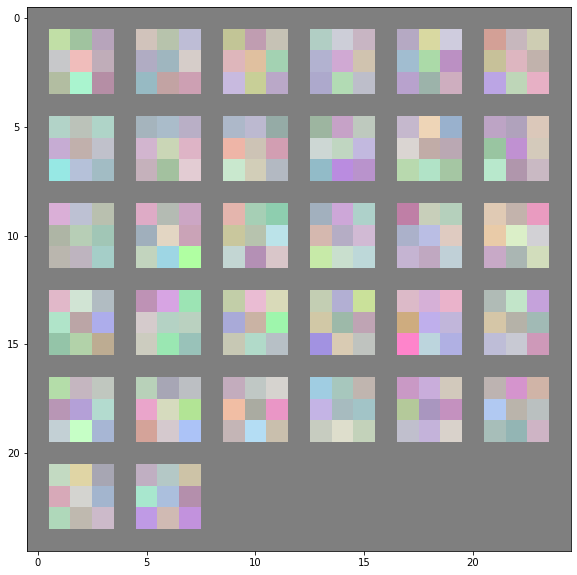

In [ ]:
# 첫 번째 layer의 filter를 확인해보자 (=가중치 확인) -> 나중에 학습을 완료한 후의 filter도 확인하기
for w in resnet50.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# 가중치 renormalization
min_w = torch.min(w)
w1 = (-1/(2 * min_w)) * w + 0.5

# make grid to display it
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torchvision.utils.make_grid(x_grid, nrow=6, padding=1)

plt.figure(figsize=(10, 10))
imshow(x_grid)

In [ ]:
# config 모델 파라미터 인자를 만들기위한 클래스
class Config:
  def __init__(self, **kwargs):
    for key, value in kwargs.items():
      setattr(self, key, value)

In [ ]:
lr = 0.0008
epochs = 30
optimizer = 'Adam'

In [ ]:
# 파라미터 클래스
config = Config(
    trainloader = trainloader,
    testloader = testloader,
    model = resnet50,
    device = device,
    optimizer = torch.optim.Adam(resnet50.parameters(), lr=lr),
    criterion= nn.CrossEntropyLoss().to(device),
    globaliter = 0
)

In [ ]:
class train_test():
      def __init__(self, config):
        # 파라미터 인자
        self.trainloader = config.trainloader
        self.testloader = config.testloader
        self.model = config.model
        self.device = config.device
        self.optimizer = config.optimizer
        self.criterion = config.criterion
        self.globaliter = config.globaliter
        print(len(trainloader))
      def train(self, epochs, log_interval):
          self.model.train()
          for epoch in range(1, epochs + 1 ):  # epochs 루프
              running_loss = 0.0
              lr_sche.step()
              for i, data in enumerate(self.trainloader, 0): # batch 루프
                  # get the inputs
                  self.globaliter += 1
                  inputs, labels = data # input data, label 분리
                  inputs = inputs.to(self.device)
                  labels = labels.to(self.device)

                  # 가중치 초기화 -> 이전 batch에서 계산되었던 가중치를 0으로 만들고 최적화 진행
                  self.optimizer.zero_grad() 

                  # forward + backward + optimize
                  outputs = self.model(inputs)
                  loss = self.criterion(outputs, labels)
                  loss.backward()
                  self.optimizer.step()
                  running_loss += loss.item()

                  # 30 iteration마다 acc & loss 출력
                  if i % log_interval == log_interval -1 : # i는 1에포크의 iteration
                    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tlearningLoss: {:.6f}\twhole_loss: {:.6f} '.format(
                        epoch, i*len(inputs), len(self.trainloader.dataset),
                        100. * i*len(inputs) / len(self.trainloader.dataset), 
                        running_loss / log_interval,
                        loss.item()))
                    running_loss = 0.0

                    #with train_summary_writer.as_default():
                    #    summary.scalar('loss', loss.item() , step = self.globaliter)

              with torch.no_grad():
                  self.model.eval()
                  correct = 0
                  total = 0
                  test_loss = 0
                  acc = []
                  for k, data in enumerate(self.testloader, 0):
                    images, labels = data
                    images = images.to(self.device)
                    labels = labels.to(self.device)
                    outputs = self.model(images)

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    test_loss += self.criterion(outputs, labels).item()
                    acc.append(100 * correct/total)

                  print('\nTest set : Average loss:{:.4f}, Accuracy: {}/{}({:.0f}%)\n'.format(
                      test_loss, correct, total, 100 * correct/total
                  ))
                  #with test_summary_writer.as_default():
                  #    summary.scalar('loss', test_loss , step = self.globaliter)
                  #    summary.scalar('accuracy', 100 * correct/total , step = self.globaliter)  
##                      if acc [k] > 60 and acc[k] > acc[k-1]:
#                         torch.save({
#                                     'epoch': epoch,
#                                     'model_state_dict': self.model.state_dict(),
#                                     'optimizer_state_dict': self.optimizer.state_dict(),
#                                     'loss': test_loss
#                                     }, PATH)
                         
      print('Finished Training')

Finished Training


In [ ]:
ready_to_train=train_test(config)

10


In [ ]:
lr_sche = optim.lr_scheduler.StepLR(config.optimizer, step_size=10000, gamma=0.5) # 20 step마다 lr조정
epochs = 200
log_interval = 175

ready_to_train.train(epochs, log_interval)

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



Test set : Average loss:3.2955, Accuracy: 66/129(51%)


Test set : Average loss:1.6539, Accuracy: 77/129(60%)


Test set : Average loss:1.5880, Accuracy: 70/129(54%)


Test set : Average loss:1.6326, Accuracy: 70/129(54%)


Test set : Average loss:1.5619, Accuracy: 88/129(68%)


Test set : Average loss:1.4682, Accuracy: 88/129(68%)


Test set : Average loss:1.4593, Accuracy: 87/129(67%)


Test set : Average loss:1.4989, Accuracy: 88/129(68%)


Test set : Average loss:1.5496, Accuracy: 85/129(66%)


Test set : Average loss:1.5594, Accuracy: 88/129(68%)


Test set : Average loss:1.4855, Accuracy: 89/129(69%)


Test set : Average loss:1.4779, Accuracy: 87/129(67%)


Test set : Average loss:1.4996, Accuracy: 83/129(64%)


Test set : Average loss:1.5104, Accuracy: 89/129(69%)


Test set : Average loss:1.4382, Accuracy: 79/129(61%)



KeyboardInterrupt: ignored

# **GRAD CAM**

In [ ]:
def generate_grad_cam(img_tensor, model, class_index, activation_layer):
    """
    params:
    -------
    img_tensor: resnet50 모델의 이미지 전처리를 통한 image tensor
    model: pretrained resnet50 모델 (include_top=True)
    class_index: 이미지넷 정답 레이블
    activation_layer: 시각화하려는 레이어 이름

    return:
    grad_cam: grad_cam 히트맵
    """
    inp = model.input
    y_c = model.output.op.inputs[0][0, class_index]
    A_k = model.get_layer(activation_layer).output
    
    ## 이미지 텐서를 입력해서
    ## 해당 액티베이션 레이어의 아웃풋(a_k)과
    ## 소프트맥스 함수 인풋의 a_k에 대한 gradient를 구한다.
    get_output = K.function([inp], [A_k, K.gradients(y_c, A_k)[0], model.output])
    [conv_output, grad_val, model_output] = get_output([img_tensor])

    ## 배치 사이즈가 1이므로 배치 차원을 없앤다.
    conv_output = conv_output[0]
    grad_val = grad_val[0]
    
    ## 구한 gradient를 픽셀 가로세로로 평균내서 a^c_k를 구한다.
    weights = np.mean(grad_val, axis=(0, 1))
    
    ## 추출한 conv_output에 weight를 곱하고 합하여 grad_cam을 얻는다.
    grad_cam = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
    for k, w in enumerate(weights):
        grad_cam += w * conv_output[:, :, k]
    
    grad_cam = cv2.resize(grad_cam, (224, 224))

    ## ReLU를 씌워 음수를 0으로 만든다.
    grad_cam = np.maximum(grad_cam, 0)

    grad_cam = grad_cam / grad_cam.max()
    return grad_cam

2